In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px

churn_data = pd.read_csv('churn.csv')
churn_data = churn_data.drop('RowNumber', axis=1)
churn_data.head()

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0



9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

Text(0.5, 1.0, 'Cоотношение ушедших и лояльных клиентов (0 - ушедшие клиенты, 1 - лояльные клиенты)')

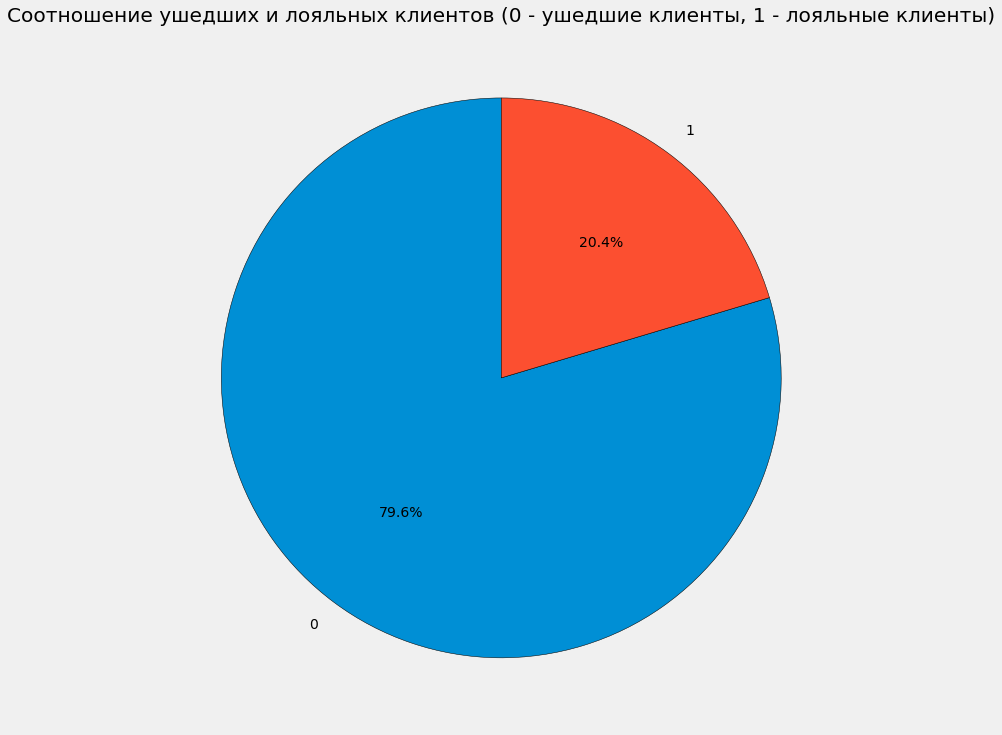

In [2]:
count_clients_df = pd.DataFrame(churn_data['Exited'].value_counts())
count_clients_df = count_clients_df.reset_index()
count_clients_df.columns = ['Status', 'Exited']

plt.style.use('fivethirtyeight')
f, ax = plt.subplots(figsize=(12, 12))
plt.pie(
    count_clients_df['Exited'],
    labels=count_clients_df['Status'],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops= {'edgecolor': 'black'}
)
plt.title('Cоотношение ушедших и лояльных клиентов (0 - ушедшие клиенты, 1 - лояльные клиенты)')

На круговой диаграмме видно, что соотношение ушедших клиентов относительно лояльных примерно 1:4, соответственно в этом датафрейме представлена информация о клиентах банка, пятая часть которых ушедшие.




9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

Text(0.5, 0, 'Баланс в долларах')

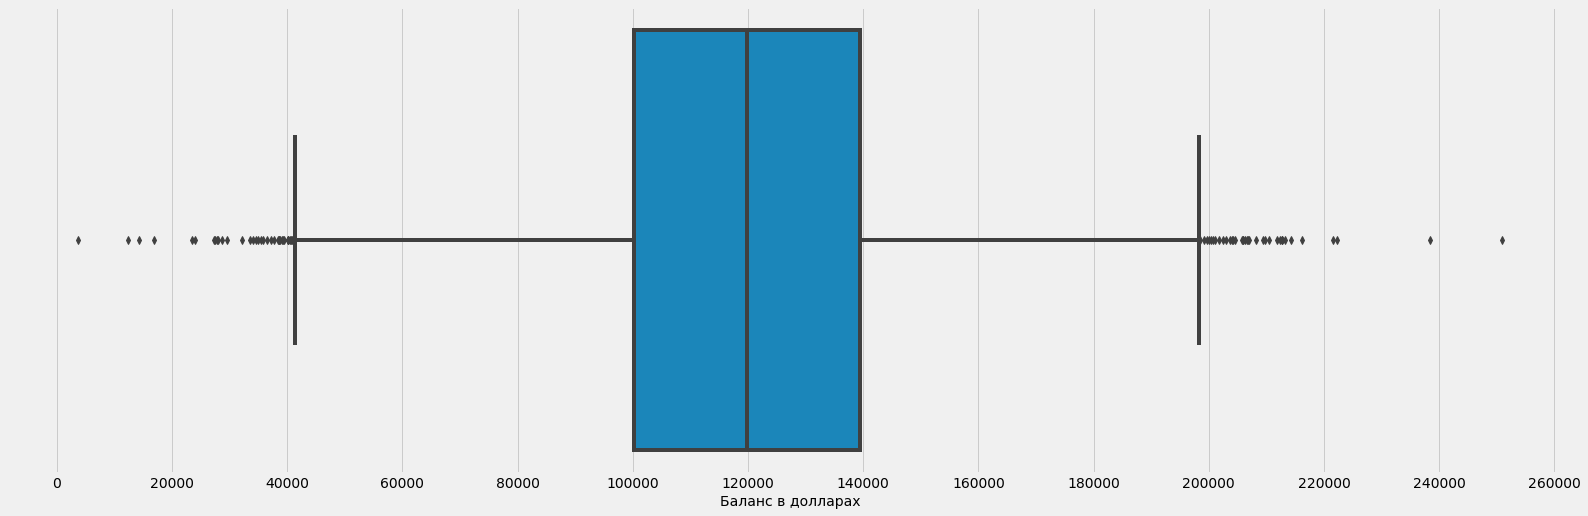

In [3]:
balance_data = churn_data[churn_data['Balance'] > 2500]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25, 8))

boxplot = sns.boxplot(
    data=balance_data,
    x='Balance',
    orient='h',
    width=0.9,
    ax=axes,
)
axes.xaxis.set_major_locator(ticker.MultipleLocator(20000))
boxplot.set_xlabel('Баланс в долларах', fontsize=14)

Из полученного графика можно сделать такие выводы:
* Медианное значение выборки - 120000
* Первый квантиль - около 100000
* Третий квантиль - около 140000
* Нижняя граница - чуть больше 40000
* Верхняя граница - чуть меньше 200000

Все значения, находящиеся вне диапазона от 40000 до 200000 можно считать выбросами

Думаю, для анализа было бы интересно рассмотреть две категории клиентов - выбросы с правой и левой стороны, и сравнить характеристики клиентов, одни из которых держат в банке слишком мало денег, а вторые слишком много. Возможно в данном анализе так же можно присоединить клиентов за границами первого квантиля - к нижним выбросам, и тех, кто за границами третьего квантиля - к верхним.




9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

Text(0, 0.5, 'Баланс')

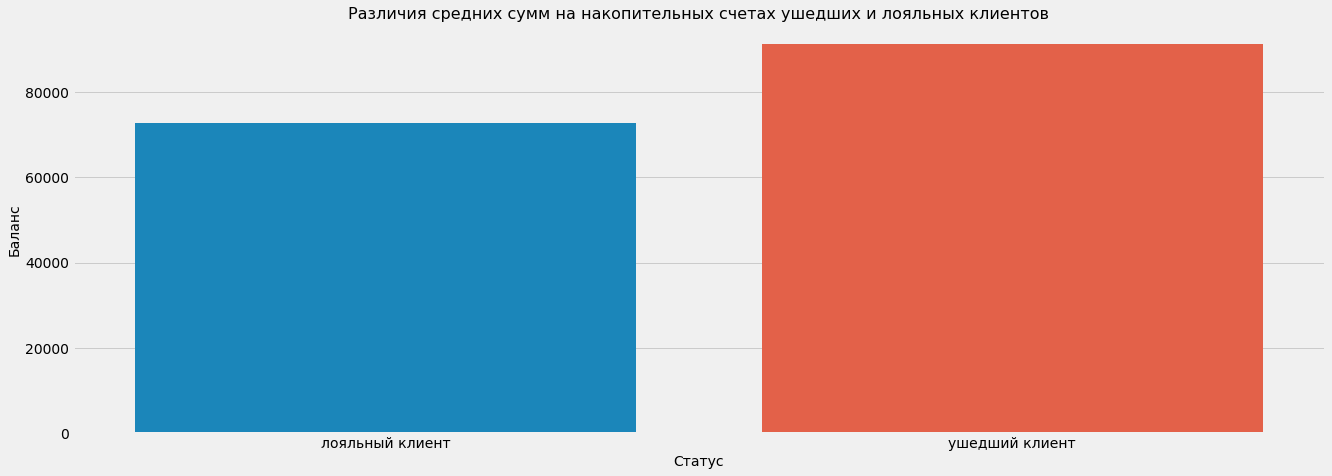

In [4]:
balance_df = churn_data[['Exited', 'Balance']]
balance_df = pd.DataFrame(balance_df.groupby('Exited', as_index=False)['Balance'].mean())
balance_df['Exited'] = balance_df['Exited'].apply(lambda x: 'ушедший клиент' if x == 1 else 'лояльный клиент')


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))
barplot1 = sns.barplot(
    data=balance_df,
    x='Exited',
    y='Balance',
    orient='v'
)
barplot1.set_title('Различия средних сумм на накопительных счетах ушедших и лояльных клиентов', fontsize=16)
barplot1.set_xlabel('Статус', fontsize=14)
barplot1.set_ylabel('Баланс', fontsize=14)

На графике различия средних сумм на накопительных счетах ушедших и лояльных клиентов видно, что у ушедших клиентов баланс в среднем в банке выше, чем у лояльных. Это может говорить о том, что банк, например, предлагает невыгодные условия по вкладам, или он не кажется солидным для более обеспеченных клиентов.




9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

Text(0, 0.5, 'Статус')

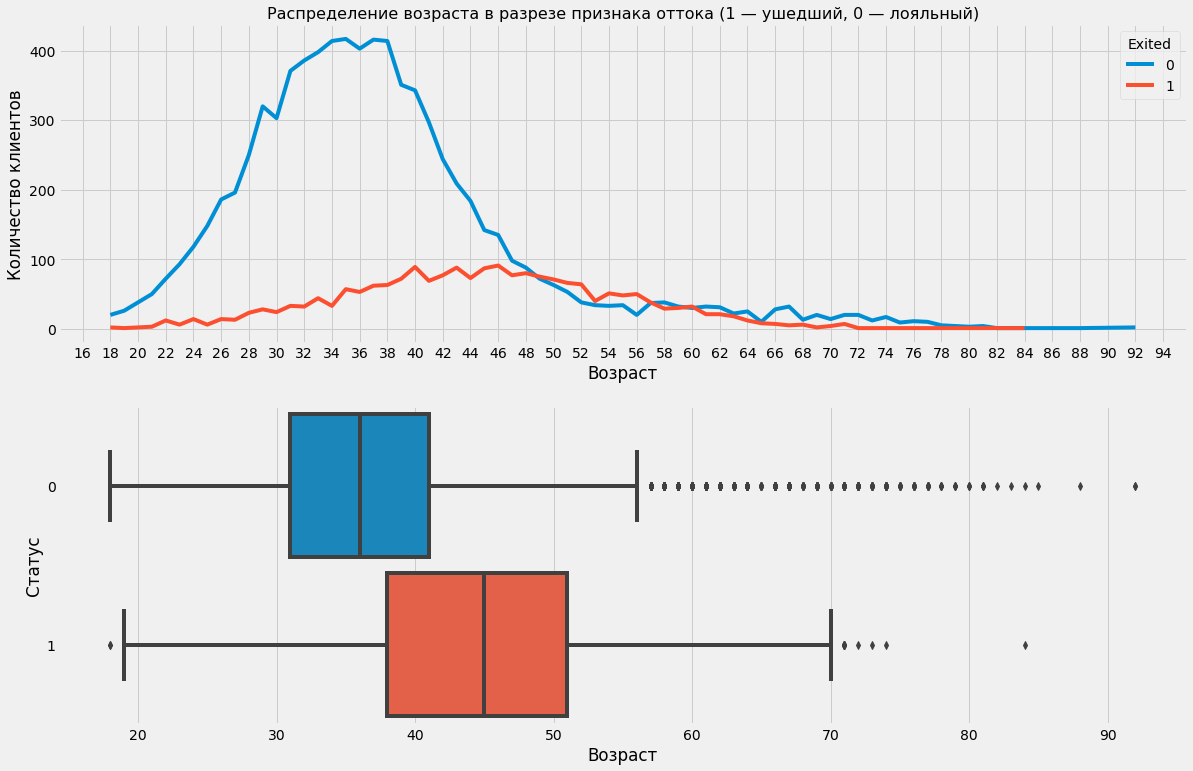

In [5]:
clients_df = pd.DataFrame(churn_data[['Exited', 'Age']].value_counts())
clients_df = clients_df.reset_index()
clients_df.columns = ['Exited', 'Age', 'count_age']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 12))

lineplot = sns.lineplot(
    x='Age',
    y="count_age",
    hue='Exited',
    data=clients_df,
    ax=axes[0]
)
lineplot.xaxis.set_major_locator(ticker.MultipleLocator(2))

lineplot.set_title('Распределение возраста в разрезе признака оттока (1 — ушедший, 0 — лояльный)', fontsize=16)
lineplot.set_xlabel('Возраст')
lineplot.set_ylabel('Количество клиентов')

boxplot = sns.boxplot(
    data=churn_data,
    x='Age',
    y='Exited',
    orient='h',
    width=0.9,
    ax=axes[1],
)
boxplot.set_xlabel('Возраст')
boxplot.set_ylabel('Статус')

Потенциальных выбросов больше в группе лояльных клиентов. Я бы посоветовала банку обратить внимание на группы возрастов от 38 до 51 т.к. в этом промежутке отток выше всего, и от 49 до 57 т.к. в этом промежутке кол-во ушедших клиентов превышает кол-во лояльных.




9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

Text(0, 0.5, 'Предполагаемая зарплата клиента')

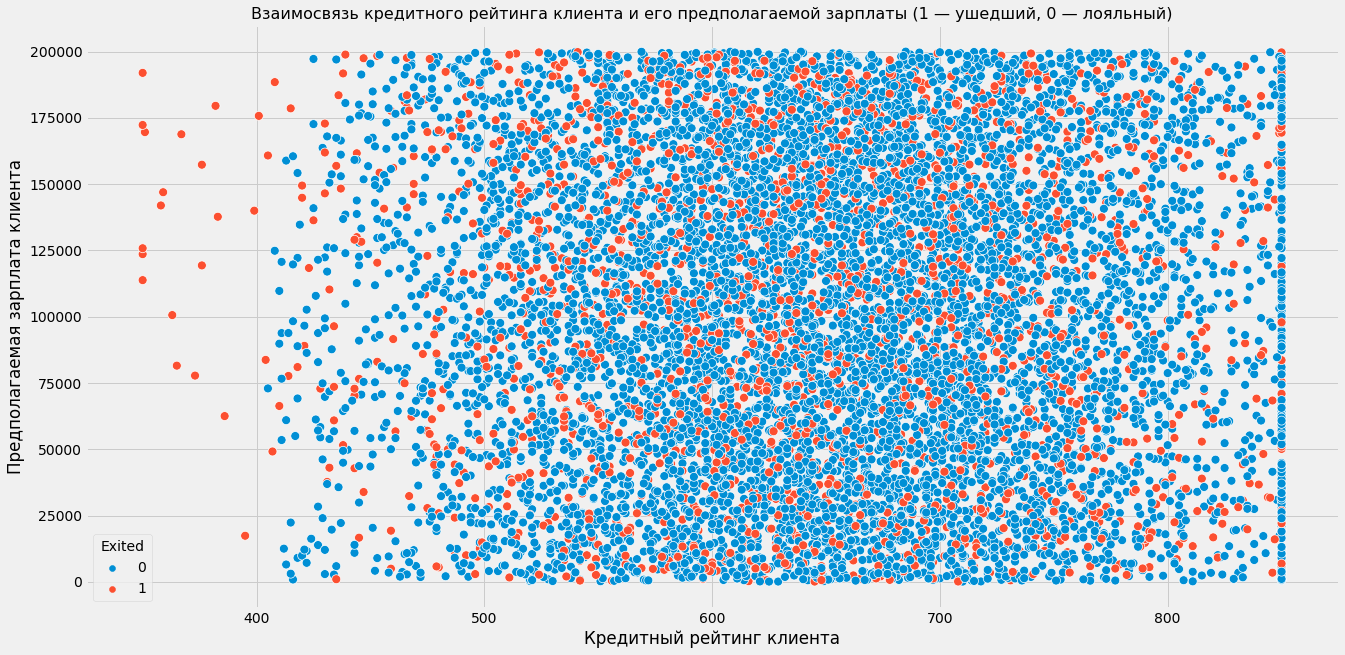

In [6]:
fig= plt.figure(figsize=(20, 10))

scatterplot = sns.scatterplot(
    data=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited',
    s=80
)

scatterplot.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты '
                      '(1 — ушедший, 0 — лояльный)', fontsize=16)
scatterplot.set_xlabel('Кредитный рейтинг клиента')
scatterplot.set_ylabel('Предполагаемая зарплата клиента')

Особой зависимости на этом графике не наблюдаю, потому что ушедшие клиенты имеют разнообразные значения признаков как по оси x так и по оси y, равно как и лояльные, однако можно заметить, что в данной выборке не существует лояльных клиентов с рейтингом ниже 400, а ушедшие клиенты с рейтингом ниже 400 есть.



9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Подсказка
Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

Text(0.5, 1.0, 'Cоотношение процентов ушедших среди мужчин и женщин')

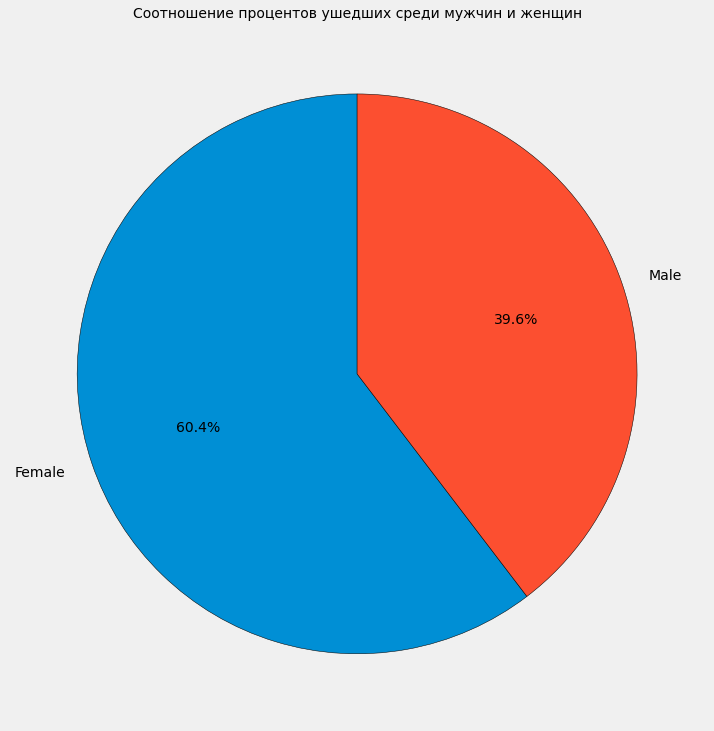

In [7]:
departed_male_female = churn_data[['Gender', 'Exited']]
departed_male_female = departed_male_female.groupby('Gender', as_index=False)['Exited'].mean()

plt.style.use('fivethirtyeight')
f, ax = plt.subplots(figsize=(12, 12))
plt.pie(
    departed_male_female['Exited'],
    labels=departed_male_female['Gender'],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops= {'edgecolor': 'black'}
)
plt.title('Cоотношение процентов ушедших среди мужчин и женщин', fontsize=14)

На диаграмме видно, что женщины уходят чаще.

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

NumOfProducts  Exited  counts
0              2       0    4242
1              1       0    3675
2              1       1    1409
3              2       1     348
4              3       1     220
5              4       1      60
6              3       0      46

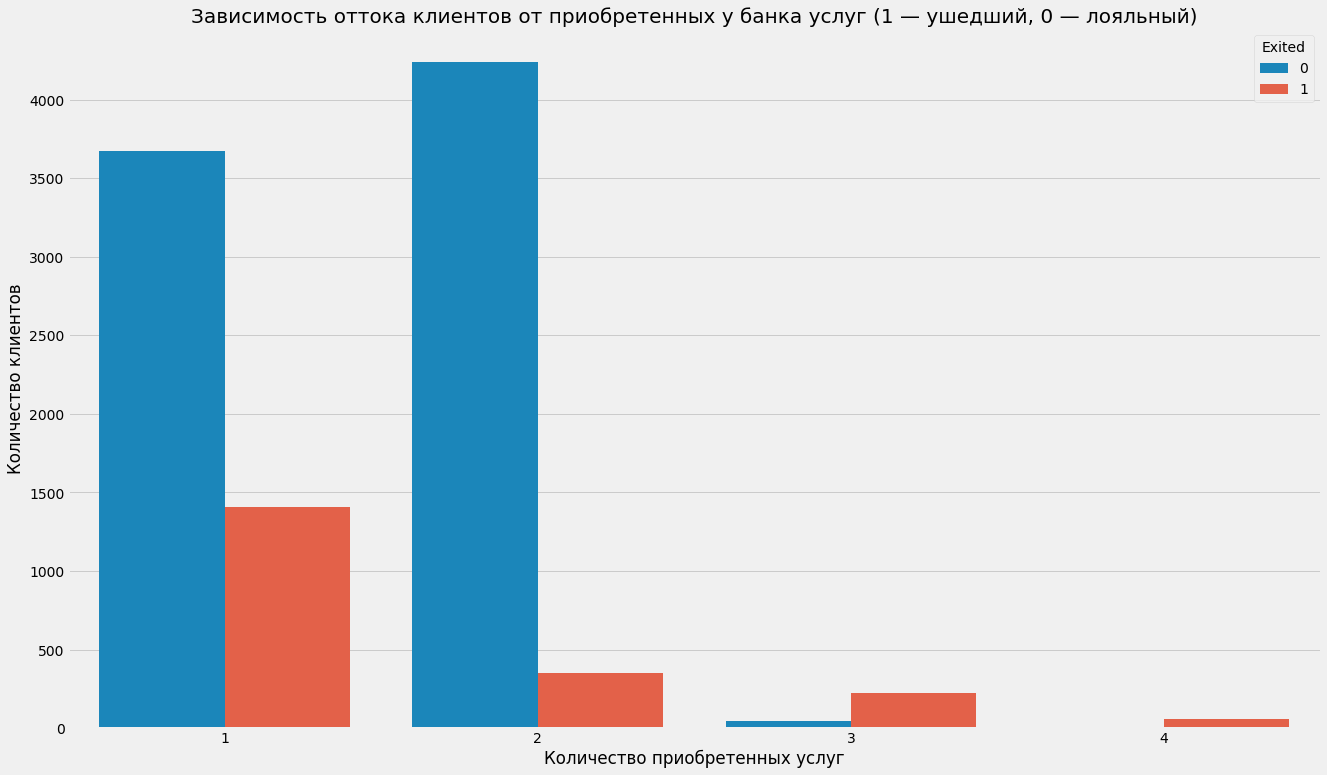

In [8]:
data_df = pd.DataFrame(churn_data[['NumOfProducts', 'Exited']].value_counts())
data_df = data_df.reset_index()
data_df.columns = ['NumOfProducts', 'Exited', 'counts']

fig, axes = plt.subplots(figsize=(20, 12))

barplot = sns.barplot(
    data=data_df,
    x='NumOfProducts',
    y='counts',
    hue='Exited',
)
barplot.set_title('Зависимость оттока клиентов от приобретенных у банка услуг '
                   '(1 — ушедший, 0 — лояльный)', fontsize=20)
barplot.set_xlabel('Количество приобретенных услуг')
barplot.set_ylabel('Количество клиентов')
data_df

На многоуровневой столбчатой диаграмме видно, что все клиенты, которые приобретали у банка 4 услуги ушли. Те, кто приобрел 3 услуги, ушли подавляющим большинством. Чуть больше четверти ушли те, кто приобрёл всего 1 услугу, и незначительное меньшинство, кто приобрёл 2 услуги.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

Text(0, 0.5, 'Количество клиентов')

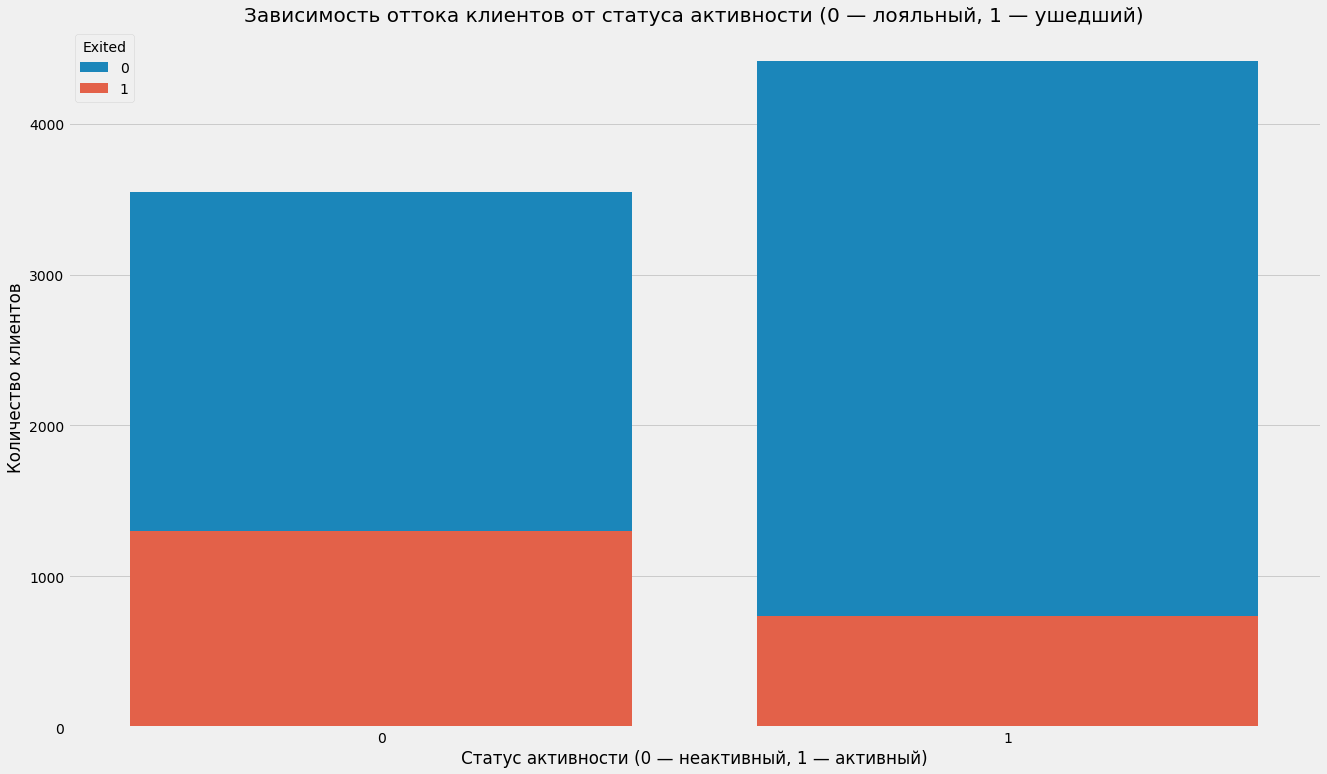

In [9]:
data_df = pd.DataFrame(churn_data[['IsActiveMember', 'Exited']].value_counts())
data_df = data_df.reset_index()
data_df.columns = ['IsActiveMember', 'Exited', 'counts']

fig, axes = plt.subplots(figsize=(20, 12))
barplot = sns.barplot(
    data=data_df,
    x='IsActiveMember',
    y='counts',
    hue='Exited',
    hue_order = [0, 1],
    orient='v',
    ci=None,
    dodge=False
)
barplot.set_title('Зависимость оттока клиентов от статуса активности '
                  '(0 — лояльный, 1 — ушедший)', fontsize=20)
barplot.set_xlabel('Статус активности (0 — неактивный, 1 — активный)')
barplot.set_ylabel('Количество клиентов')

На графике видно, что около 3500 клиентов являются неактивными и лояльными, для этой категории клиентов я бы предложила, например, повышенный кэшбэк за покупки, скидки в магазинах партнеров, или что угодно, чтобы замотивировать их возобновить пользоваться продуктами банка. Активным, но ушедшим (их около 800) я бы предложила выпустить карту банка, чтобы они, например, всегда могли переводить деньги бесплатно. С неактивными и ушедшими даже не знаю что посоветовать т.к. они не заинтересованы пользоваться услугами банка. Наверное на них уже не стоит тратить ресурсы банка, лучше искать новых клиентов.

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [10]:
country_df = churn_data[['Geography', 'Exited']]
country_df = country_df.groupby('Geography', as_index=False)['Exited'].mean()

px.choropleth(
    data_frame=country_df,
    locations="Geography",
    locationmode = "country names",
    color="Exited",
    range_color=[0, 1],
    title='Соотношение долей ушедших клиентов по странам',
    width=800,
    height=500,
    color_continuous_scale='Reds'
)
# map not displayed on git

На карте мира видно, что самая большая доля ушедших клиентов в Германии. Возможно это связано с тем что в Германии открылся новый банк-конкурент которые предлагает более выгодные условия для клиентов.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [11]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Text(70.66, 0.5, 'Категории кредитного рейтинга')

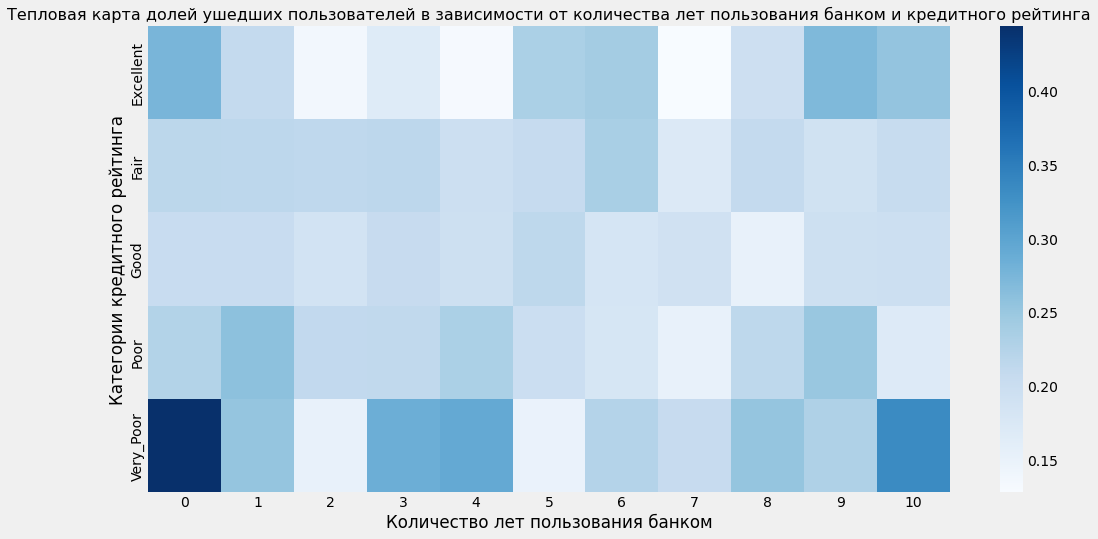

In [12]:
fig, axes = plt.subplots(figsize=(16, 8))
heat_map_df = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
)

heatmap = sns.heatmap(data=heat_map_df, cmap='Blues', ax=axes)
heatmap.set_title('Тепловая карта долей ушедших пользователей в зависимости от количества лет пользования банком и кредитного рейтинга', fontsize=16)
heatmap.set_xlabel('Количество лет пользования банком')
heatmap.set_ylabel('Категории кредитного рейтинга')

На тепловой карте видно, что самые частоуходящие клиенты пользовались банком менее года и имели очень плохой кредитный рейтинг. На втором месте по покидаемости оказались клиенты, которые сотрудничали с банком около 10 лет и тоже имели очень плохой рейтинг. Так же можно выделить несколько категорий клиентов которые уходили менее часто: клиенты с очень плохим рейтингом, которые сотрудничали с банком 3 и 4 года, и клиенты с отличным рейтингом, которые были с банком 1 и 9 лет.

Было очень интересно, спасибо!)